In [12]:
print ("Om Vakraduntaya Namah")

Om Vakraduntaya Namah


# Customer Churn Modelling

### Workflow:

Data Wrangling:  The process of transforming raw data to a clean organized format ready for use.

 - Inspection of data
 - Isolate model features
 - Check feature data types
 - Convert any strings to integers for modelling
 - Data imputation
 - Outliers and distributions
 
 
Exploratory Data Analysis:

 - Correlation Matrix
 - Heatmap
 - Feature importance by Random Forest classifier (mean difference in impurity analysis)
 - Data discretitisation (to break up a  numerical feature into discrete bins) and visualisation with Seaborn
 - Customer segmentation and intervention strategies
 
Predictive Modelling:
 
 - Logistic Regression
 - Decision Tree
 - Random Forest
 - Gradient Boosting
 - SVM
 - KNN 
 - Neural Network

# Introduction

In this notebook, customer churn will be explored, visualised and modelled. This type of analysis is valuable in a number of ways. Firstly, due to rapid developments in technology, unique products and services are becoming commoditised faster than ever before, thus, markets are reaching new levels of efficiency and facing higher levels of competition. Furthermore, as technology continues to develop, the tools employed in enacting the 4 p’s of marketing (product, promotion, placement, and price) are increasingly becoming both digitised and democratised across a large number of consumers. This digitisation and democratisation is shifting the balance of power from firms to consumers. As a result, firms are losing control over the marketing mix and consumers are taking on more active and expansive roles across various marketing activities. 

In parallel to these developments, firms have acquired more data on their customers than at any other point in history, giving them the capacity to understand their customers with a level of granularity that was previously not possible. 

Finally, from a growth perspective, focusing on customer retention rather than just customer accquisition offers another lever for companies to pull when attempting to optimise their growth targets.

For the preceding reasons, moving beyond traditional product centric approaches to marketing, and adopting more customer centric strategies has the capacity to give companies the necessary edge in todays hyper competitive market place. This analysis will explore this idea further.

The data files state that the data is "artificial and based on claims similar to the real world".

# Import all the necessary packages 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import neural_network
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [32]:
df = pd.read_csv("D:/dat1/pychurn.csv",sep=',')
df.head(2)   # head(df,2)

,Unnamed: 0,account.length,international.plan,voice.mail.plan,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,number.customer.service.calls,churn
0,1,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,2,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


In [4]:
df.size

34960

In [5]:
df.describe()

,Unnamed: 0,account.length,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,number.customer.service.calls
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,920.500000,99.652717,8.540761,180.179402,100.269565,30.631027,200.407065,100.209239,17.034793,200.219022,100.450543,9.009918,10.208043,4.499457,2.756707,1.542935
std,531.306566,39.937792,14.007901,54.049201,19.999379,9.188340,51.226070,19.827786,4.354181,51.376336,19.565585,2.311955,2.797393,2.501549,0.755324,1.304739
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.200000,12.000000,2.650000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,460.750000,73.000000,0.000000,145.000000,87.000000,24.650000,165.900000,87.000000,14.100000,166.975000,87.000000,7.517500,8.400000,3.000000,2.270000,1.000000
50%,920.500000,98.500000,0.000000,180.800000,100.500000,30.735000,202.250000,101.000000,17.195000,200.650000,101.000000,9.030000,10.200000,4.000000,2.750000,1.000000
75%,1380.250000,127.000000,21.250000,216.800000,113.000000,36.860000,234.550000,114.000000,19.935000,236.425000,114.000000,10.640000,12.000000,6.000000,3.240000,2.000000
max,1840.000000,243.000000,51.000000,350.800000,165.000000,59.640000,351.600000,168.000000,29.890000,381.900000,175.000000,17.190000,20.000000,19.000000,5.400000,9.000000


In [99]:
df.dtypes

Unnamed: 0                         int64
account.length                     int64
international.plan                object
voice.mail.plan                   object
number.vmail.messages              int64
total.day.minutes                float64
total.day.calls                    int64
total.day.charge                 float64
total.eve.minutes                float64
total.eve.calls                    int64
total.eve.charge                 float64
total.night.minutes              float64
total.night.calls                  int64
total.night.charge               float64
total.intl.minutes               float64
total.intl.calls                   int64
total.intl.charge                float64
number.customer.service.calls      int64
churn                             object
dtype: object

In [6]:
df['churn'].value_counts()

 False.    1603
 True.      237
Name: churn, dtype: int64

In [7]:
237/float(1603) * 100

14.784778540237056

# Converting Strings to Numerical Values

In [15]:
df_2 = df.select_dtypes(include = [object])
df_2.head(2)

,international.plan,voice.mail.plan,churn
0,no,yes,False.
1,no,yes,False.


In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_3 = df_2.apply(le.fit_transform)
df_3.head(5)

,international.plan,voice.mail.plan,churn
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0


In [33]:
cols = df_3.columns
for x in cols:
    df[x] = df_3[x]
df.head(20)  

,Unnamed: 0,account.length,international.plan,voice.mail.plan,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,number.customer.service.calls,churn
0,1,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,3,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,4,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,5,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,6,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,7,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,8,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,9,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,10,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


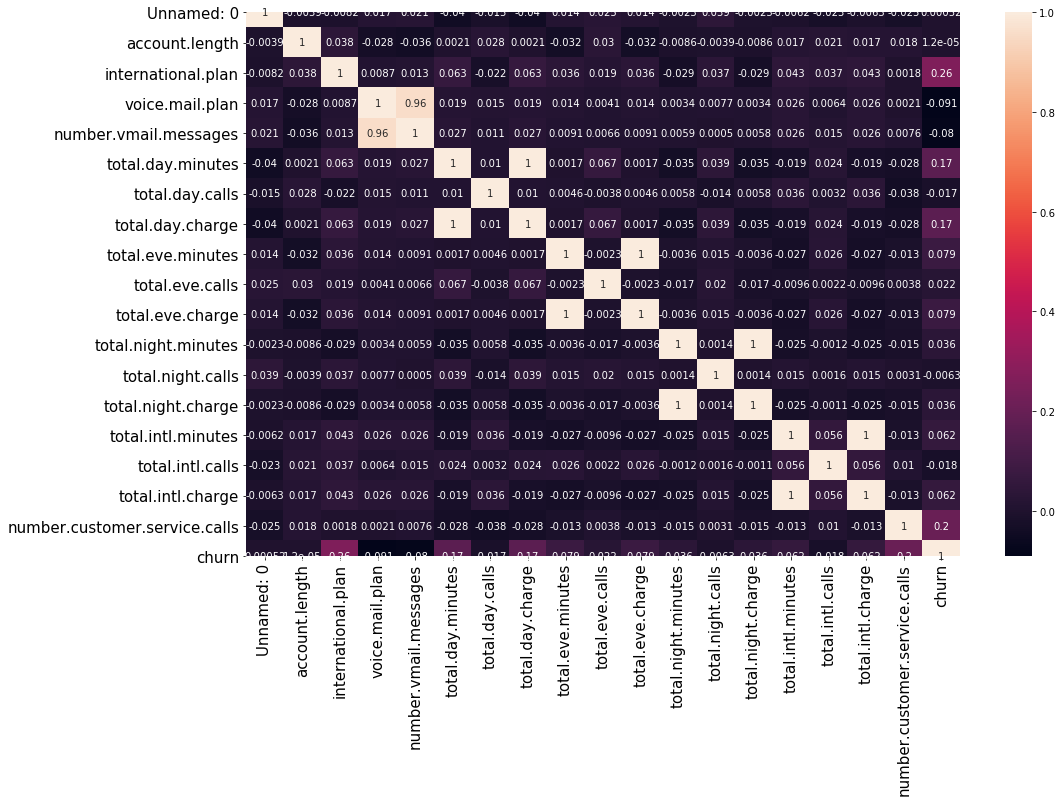

In [34]:
corr = df.corr()
plt.figure(figsize=(16,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
sns.heatmap(corr,annot=True)
#sns.title('Heatmap of Feature Correlations', fontsize = 20)

In [19]:
churn_corr = pd.DataFrame(corr['churn'].drop('churn'))
churn_corr.sort_values(by = 'churn', ascending = False) # moving our target value to the left for ease of analysis

,churn
international.plan,0.261128
number.customer.service.calls,0.204388
total.day.minutes,0.168015
total.day.charge,0.168013
total.eve.minutes,0.079271
total.eve.charge,0.079254
total.intl.charge,0.062073
total.intl.minutes,0.061954
total.night.charge,0.035932
total.night.minutes,0.035905


In [35]:
x = df.drop(columns = ['churn','account.length'], axis=1)
y = df['churn']

In [21]:
from sklearn.model_selection import train_test_split
inpfeat_train,inpfeat_test,label_train,label_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
inpfeat_train.dtypes
label_train.dtypes


dtype('int32')

In [36]:
# n_jobs = -1 , use all cores
# n_jobs = 1 ,use only one core
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(inpfeat_train,label_train)

LogisticRegression()

In [37]:
#from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
#score2 = cross_validation.cross_val_score(log,x,y,cv=5)
score2 = cross_val_score(log,x,y,cv=5)
print("lin_reg: mean="+str(np.mean(score2))+ " std=" + str(np.std(score2)))

lin_reg: mean=0.8684782608695653 std=0.0036860489038724347


In [41]:
logit_score_train = log.score(inpfeat_train,label_train)
print ('Model Score on Training data set', logit_score_train)

Model Score on Training data set 0.8675271739130435


In [40]:
logit_score_test = log.score(inpfeat_test,label_test)
print ('Model Score on Test data set', logit_score_test)

Model Score on Test data set 0.8831521739130435


In [42]:
from sklearn.metrics import roc_auc_score  # receiving operating characteristic 
logit_auc_train = roc_auc_score(label_train,log.predict(inpfeat_train))
logit_auc_test = roc_auc_score(label_test,log.predict(inpfeat_test))
print ('Auc on  Training data set', ',',logit_auc_train)
print ('Auc on  Test data set', logit_auc_test)

Auc on  Training data set , 0.5130353593157039
Auc on  Test data set 0.49846625766871167


In [29]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(label_test,log.predict(inpfeat_test)))

[[325   1]
 [ 42   0]]


In [30]:
from sklearn.feature_selection import RFE
rfe = RFE(log,8)
r1 = rfe.fit(x,y)
print (r1)
print(r1.support_)
print(r1.ranking_)
# print("Num Features: %d") % r1.n_features_
#print("Selected Features: %s") % r1.support_
# print("Feature Ranking: %s") % r1.ranking_

RFE(estimator=LogisticRegression(), n_features_to_select=8)
[False  True  True  True False False False False False False False  True
 False  True  True  True  True]
[10  1  1  1  4  2  5  6  3  9  7  1  8  1  1  1  1]


In [29]:
print (rfe)


RFE(estimator=LogisticRegression(), n_features_to_select=8)


In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(inpfeat_train,label_train)

DecisionTreeClassifier()

In [31]:
dt_score_train = dtree.score(inpfeat_train, label_train)
dt_score_test = dtree.score(inpfeat_test, label_test)
dt_auc_score_train = roc_auc_score(label_train, dtree.predict(inpfeat_train))
dt_auc_score_test = roc_auc_score(label_test, dtree.predict(inpfeat_test))
print (dt_auc_score_train)
print (dt_auc_score_test)

1.0
0.8744522348816827


In [30]:
inpfeat_train.dtypes

Unnamed: 0                         int64
account.length                     int64
international.plan                 int32
voice.mail.plan                    int32
number.vmail.messages              int64
total.day.minutes                float64
total.day.calls                    int64
total.day.charge                 float64
total.eve.minutes                float64
total.eve.calls                    int64
total.eve.charge                 float64
total.night.minutes              float64
total.night.calls                  int64
total.night.charge               float64
total.intl.minutes               float64
total.intl.calls                   int64
total.intl.charge                float64
number.customer.service.calls      int64
dtype: object

In [67]:
df_4 = df.select_dtypes(include = [int,float])
df_4.head()
df_4.drop(['churn','international.plan','voice.mail.plan'],axis=1,inplace=True)

In [68]:
type(df_4)

pandas.core.frame.DataFrame

In [69]:
df_4.head()

,total.day.minutes,total.day.charge,total.eve.minutes,total.eve.charge,total.night.minutes,total.night.charge,total.intl.minutes,total.intl.charge
0,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70
1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70
2,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29
3,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78
4,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73


In [128]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(inpfeat_train) 
#X_test = sc.transform(inpfeat_test) 

In [130]:
# X_train=pd.DataFrame(X_train)
type(X_train)

numpy.ndarray

In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(inpfeat_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [133]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [134]:
#Doing the PCA on the train data
pca.fit(inpfeat_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [135]:
print(pca.components_)

[[-9.99986876e-01  9.77028998e-07 -1.33528105e-06 -1.80150133e-04
   4.12084246e-03  6.82373864e-04  7.00557574e-04 -1.26030259e-03
  -9.37782139e-04 -1.07062694e-04 -1.74336065e-03 -1.65280239e-03
  -7.84677602e-05  5.01193574e-05  9.92389433e-05  1.36756928e-05
   9.73182957e-05]
 [-4.62292650e-03 -3.32298550e-04 -8.55496202e-05 -4.17869496e-03
  -9.11294221e-01 -1.30880004e-03 -1.54919290e-01  1.99093009e-01
  -2.85181532e-02  1.69222861e-02  3.22805588e-01 -1.86823812e-02
   1.45274252e-02  7.44597042e-04  1.98747043e-04  2.01158994e-04
   5.98749232e-04]
 [ 4.58112089e-04 -1.44807813e-04 -1.84990286e-04 -4.93186328e-03
  -3.47078934e-01 -1.47478868e-02 -5.90052679e-02 -7.65566069e-01
  -1.10183600e-02 -6.50714283e-02 -5.33440145e-01 -1.49980010e-02
  -2.40045800e-02  2.15720557e-03 -8.10246680e-04  5.81301852e-04
   4.55052894e-04]
 [-2.62536665e-07  1.43785566e-04 -8.07186003e-05 -3.72164238e-03
  -1.39548262e-01 -6.97129880e-03 -2.37223055e-02  6.05779423e-01
  -3.85117880e-03  

In [136]:
colnames = list(inpfeat_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-9.999869e-01,-0.004623,Unnamed: 0
1,9.770290e-07,-0.000332,international.plan
2,-1.335281e-06,-0.000086,voice.mail.plan
3,-1.801501e-04,-0.004179,number.vmail.messages
4,4.120842e-03,-0.911294,total.day.minutes


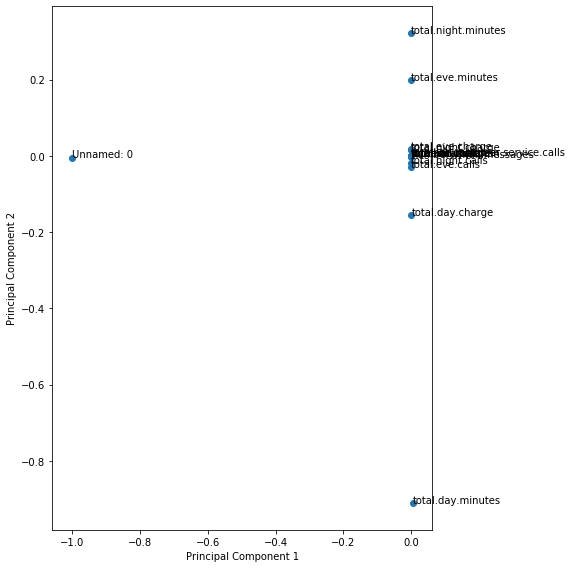

In [137]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [138]:
pca.explained_variance_ratio_

array([9.67109701e-01, 1.03932502e-02, 8.99984377e-03, 8.75301328e-03,
       1.37925531e-03, 1.34514597e-03, 1.29369003e-03, 6.69995369e-04,
       2.89160065e-05, 2.09929242e-05, 5.84200231e-06, 2.97527613e-07,
       5.69045008e-08, 2.82461826e-11, 2.76984345e-11, 2.66384481e-11,
       2.41750681e-11])

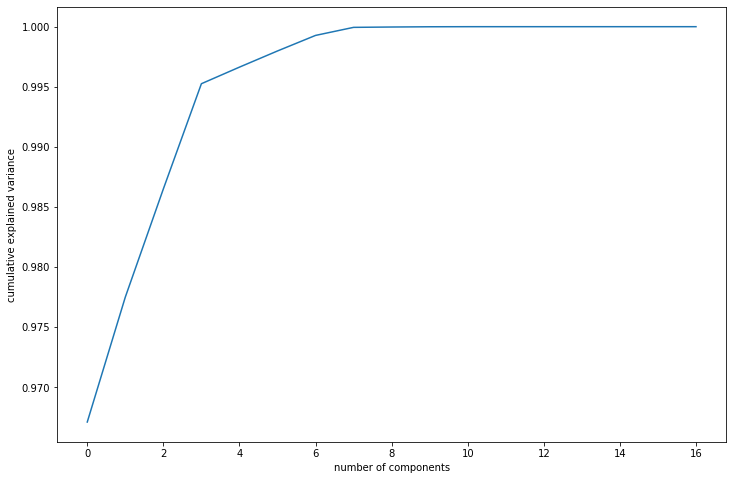

In [139]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [140]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=6)

In [146]:
df_train_pca = pca_final.fit_transform(inpfeat_train)
df_train_pca.shape

(1472, 6)

## Creating correlation matrix for the principal components - we expect little to no correlation

In [147]:

#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

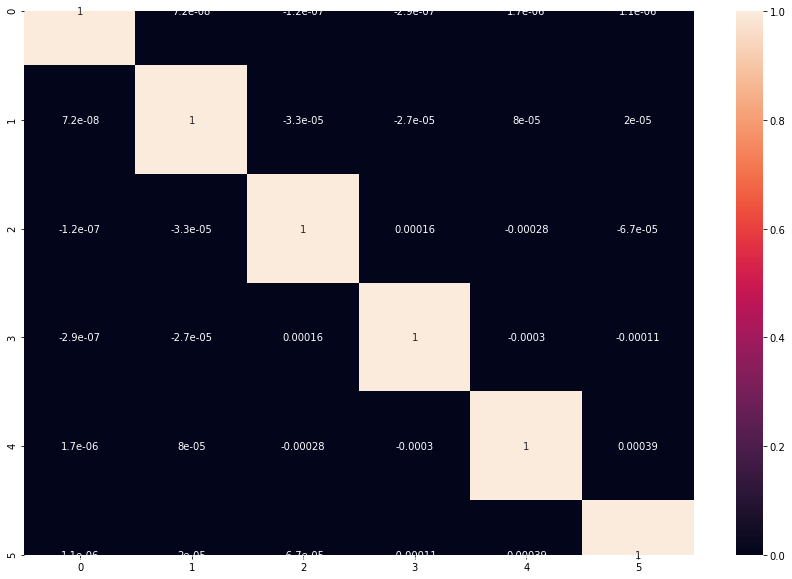

In [148]:

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,10))
sns.heatmap(corrmat,annot = True)

## Indeed - there is no correlation between any two components! Good job, PCA!
* We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [149]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(inpfeat_test)
df_test_pca.shape

(368, 6)

In [151]:
log = LogisticRegression()
model_pca = log.fit(df_train_pca,label_train)

In [154]:
from sklearn import metrics
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(label_test, pred_probs_test))

'0.72'

In [54]:
#print(pca.explained_variance_)

In [32]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [33]:
inpfeat_train.columns

Index(['Unnamed: 0', 'account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.minutes', 'total.day.calls',
       'total.day.charge', 'total.eve.minutes', 'total.eve.calls',
       'total.eve.charge', 'total.night.minutes', 'total.night.calls',
       'total.night.charge', 'total.intl.minutes', 'total.intl.calls',
       'total.intl.charge', 'number.customer.service.calls'],
      dtype='object')

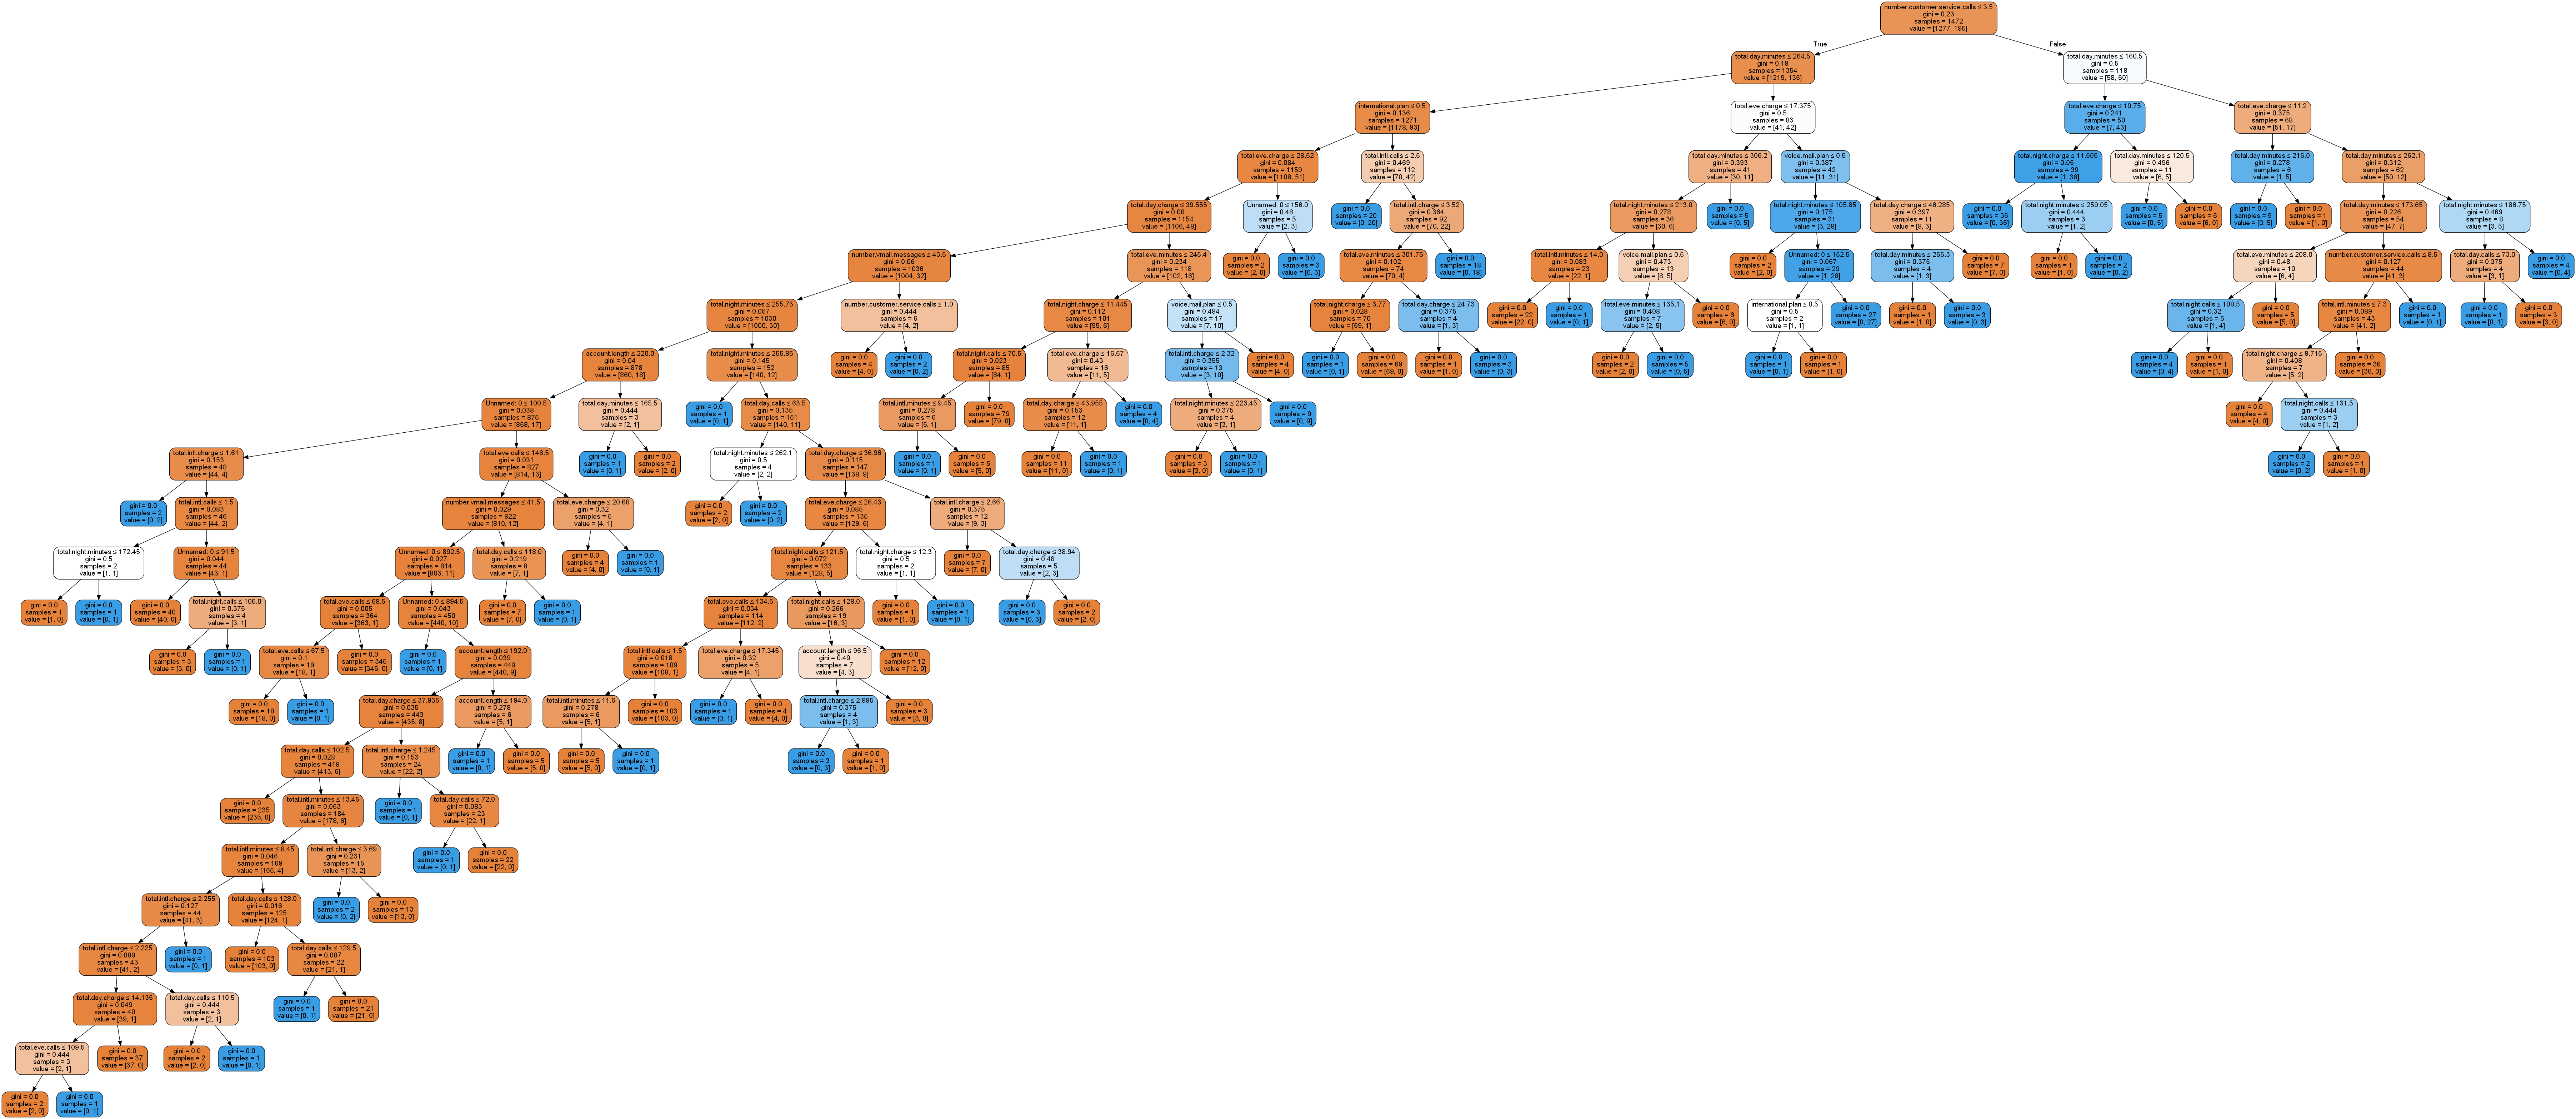

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

dot_data = StringIO()
''' dtr_best was previously defined'''
tree.export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=inpfeat_train.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [34]:
# n_estimators sets the number of trees to construct , defalts to 10 
# max_features  sets the number of features to consider at each node.  Defaults to p features, where p is the 
# totalnumber of features 
# bootstrap sets whether or not to sample with replacement, defaults to True


#rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto')
rfc = RandomForestClassifier()
rfc.fit(inpfeat_train, label_train)

RandomForestClassifier()

In [35]:
df.columns

Index(['Unnamed: 0', 'account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.minutes', 'total.day.calls',
       'total.day.charge', 'total.eve.minutes', 'total.eve.calls',
       'total.eve.charge', 'total.night.minutes', 'total.night.calls',
       'total.night.charge', 'total.intl.minutes', 'total.intl.calls',
       'total.intl.charge', 'number.customer.service.calls', 'churn'],
      dtype='object')

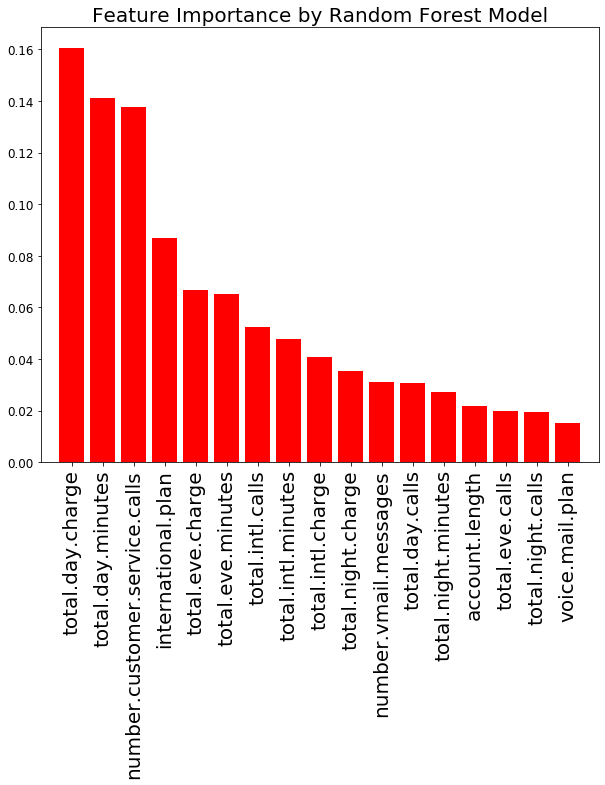

In [36]:
from sklearn.ensemble import RandomForestClassifier

predictors = ['account.length', 
       'international.plan', 'voice.mail.plan', 'number.vmail.messages',
       'total.day.minutes', 'total.day.calls', 'total.day.charge',
       'total.eve.minutes', 'total.eve.calls', 'total.eve.charge',
       'total.night.minutes', 'total.night.calls', 'total.night.charge',
       'total.intl.minutes', 'total.intl.calls', 'total.intl.charge',
       'number.customer.service.calls']
rf = RandomForestClassifier(random_state=1, n_estimators=50,
                            max_depth=9,
                            min_samples_split=6,
                            min_samples_leaf=4)
    
rf.fit(df[predictors],df["churn"])
importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
plt.figure(figsize=(10,8))
plt.title("Feature Importance by Random Forest Model", fontsize = 20)
plt.bar(range(np.size(predictors)), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, fontsize = 20, rotation='vertical')
plt.yticks(fontsize = 12)

plt.xlim([-1, np.size(predictors)])
plt.show()

In [37]:
rfc.score(inpfeat_test,label_test)

0.9538043478260869

In [38]:
pd.crosstab(label_test, rfc.predict(inpfeat_test))

col_0,0,1
churn,,
0,323,3
1,14,28


In [39]:
rfc.feature_importances_

array([0.04059669, 0.0354878 , 0.07358014, 0.01199109, 0.02756073,
       0.11862741, 0.04050889, 0.11682414, 0.06539909, 0.031903  ,
       0.0626178 , 0.04120217, 0.03342627, 0.04218136, 0.04538198,
       0.05106704, 0.051803  , 0.10984139])

In [40]:
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=8,
                                 subsample=0.5, 
                                 max_features='auto',
                                 learning_rate=0.05)
gbc.fit(inpfeat_train, label_train)



#rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto')
rfc = RandomForestClassifier()
rfc.fit(inpfeat_train, label_train)

RandomForestClassifier()

In [41]:
gbc.score(inpfeat_test,label_test)

0.9565217391304348

In [42]:
gbc.feature_importances_

array([0.04254975, 0.03743424, 0.04874527, 0.01675239, 0.03629672,
       0.11723295, 0.03802401, 0.09933379, 0.07518139, 0.03632294,
       0.07444665, 0.0513599 , 0.0289121 , 0.03766216, 0.05181975,
       0.06972393, 0.04743481, 0.09076723])

In [43]:
pd.crosstab(label_test, gbc.predict(inpfeat_test))

col_0,0,1
churn,,
0,323,3
1,13,29


In [46]:

# support vector machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(inpfeat_train, label_train)
svm_score_train = svm.score(inpfeat_train, label_train)
svm_score_test = svm.score(inpfeat_test, label_test)
svm_auc_score_train = roc_auc_score(label_train, svm.predict(inpfeat_train))
print (svm_score_train)
print (svm_score_test)

# k-nearest neigbours

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(inpfeat_train,label_train)
knn_score_train = knn.score(inpfeat_train, label_train)
knn_score_test = knn.score(inpfeat_test, label_test)
knn_auc_score_train = roc_auc_score(label_train, knn.predict(inpfeat_train))
knn_auc_score_test = roc_auc_score(label_test, knn.predict(inpfeat_test))
print (knn_auc_score_train)
print (knn_auc_score_test)    

0.8675271739130435
0.8858695652173914
0.5775294660964198
0.5238095238095238


In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(inpfeat_train, label_train).predict(inpfeat_train) # Chained FIT and PRED
print (y_pred)
print("Number of mislabeled points out of a total %d points : %d" % (inpfeat_train.shape[0],(label_train != y_pred).sum()))

[0 1 0 ... 0 0 0]
Number of mislabeled points out of a total 1472 points : 198


In [48]:
from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression()
log1.fit(inpfeat_train,label_train)

from sklearn import linear_model as lm
# data processing
scaler = preprocessing.StandardScaler().fit(inpfeat_train)
X_train_scaled = scaler.transform(inpfeat_train)
X_test_scaled = scaler.transform(inpfeat_test)
'''
alphas = [0.1,0.5,1,5,10]
for i in alphas:
    model = lm.RidgeClassifier(alpha=i)
    fitted = model.fit(X_train_scaled,inpfeat_train)
    print('Ridge Regression score for training set: %f' % fitted.score(X_train_scaled, inpfeat_train))
    print("Alpha value:",i)
    y_true, y_pred = y_test, fit.predict(X_test_scaled)
    print(classification_report(y_true, y_pred))
'''

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


'\nalphas = [0.1,0.5,1,5,10]\nfor i in alphas:\n    model = lm.RidgeClassifier(alpha=i)\n    fitted = model.fit(X_train_scaled,inpfeat_train)\n    print(\'Ridge Regression score for training set: %f\' % fitted.score(X_train_scaled, inpfeat_train))\n    print("Alpha value:",i)\n    y_true, y_pred = y_test, fit.predict(X_test_scaled)\n    print(classification_report(y_true, y_pred))\n'

#### HYPER PARAMETER TUNING

- Machine learning algorithms tend to be known as black box algorithms. There are inputs (our features, independent variables) and outputs (our dependant variable/s).


- There is not a huge amount of control over what happens underneath the hood of these algorithms. However, there is still some model parameters that can be controlled and tuned by the practitioner. These are known as hyperparameters, and in some models (such as SVMs) can drastically affect model performance.


- However, a problem arises when it comes to hyperparamter tuning as each hyperparameter value in a model is contingent upon every other hyperparameter value. Lets consider a model where we have 4 hyperparameters and each hyperparameter has 4 specified values. In this situation we would have 4 to the power of 4 potential hyperparameter combinations, meaning that we would have 256 hyperparameter values that we would need to optimise, a highly inefficient task. Therefore, we can use algorithms to tune and optimse our hyperparameters for us. Grid search is one such method. A grid search algorithm takes a brute force approach, comapring all hyperparameter combinations until the optimal value is accquired. Random search and Bayesian methods are also popular, however, due to the relatively small hyperparameter spaces that I have defined in this analysis, a grid search will be used.

In [49]:

# with n_jobs=1 it uses 100% of the cpu of one of the cores. Each process is run in a different core.
# In linux with 4 cores I can clearly see the cpu usage:(100%,~5%, ~5%, ~5%) when I run n_jobs=1
# and (100%, 100%, 100%, 100%) when running with n_jobs=-1. 

# Each process takes the 100% usage of a given core, but if you have n_jobs=1 only one core is used.
# – Imanol Luengo Sep 25 '15 at 13:26 

rf_grid = {
    'max_depth': [4, 8, None],
    'max_features': ['sqrt', 'log2', None],
    # 'min_samples_split': [1, 2, 4],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True], # Mandatory with oob_score=True
    'n_estimators': [50, 100, 200, 400],
    'random_state': [67],
    'oob_score': [True],
    'n_jobs': [-1]
    }

In [50]:

# with n_jobs=1 it uses 100% of the cpu of one of the cores. Each process is run in a different core.
# In linux with 4 cores I can clearly see the cpu usage:(100%,~5%, ~5%, ~5%) when I run n_jobs=1
# and (100%, 100%, 100%, 100%) when running with n_jobs=-1. 

# Each process takes the 100% usage of a given core, but if you have n_jobs=1 only one core is used.
# – Imanol Luengo Sep 25 '15 at 13:26 
    
rf_grid_cv = GridSearchCV(RandomForestClassifier(),
                             rf_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='roc_auc')
rf_grid_cv.fit(inpfeat_train, label_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.7min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [4, 8, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200, 400], 'n_jobs': [-1],
                         'oob_score': [True], 'random_state': [67]},
             scoring='roc_auc', verbose=True)

In [52]:
rf_grid_cv.fit(inpfeat_train, label_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.8min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [4, 8, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200, 400], 'n_jobs': [-1],
                         'oob_score': [True], 'random_state': [67]},
             scoring='roc_auc', verbose=True)

In [53]:
rf_grid_cv.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 4,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 67}

In [56]:
rf_grid_cv.best_score_

0.9138633971216692

In [58]:
best_model = rf_grid_cv.best_estimator_
print (best_model)

RandomForestClassifier(max_depth=8, max_features=None, min_samples_leaf=4,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=67)


In [59]:
best_model.oob_score_

0.936141304347826

In [61]:
def plot_confusion_matrix(model, X_test, y_true):
    '''Code stolen brazenly from sklearn example.'''
    cm = confusion_matrix(y_true, model.predict(X_test))

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[325   1]
 [ 15  27]]


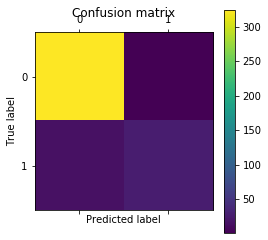

In [66]:
plot_confusion_matrix(best_model, inpfeat_test, label_test)

In [63]:
#max_iter : int, optional, default 200
#Maximum number of iterations. The solver iterates until convergence 
# (determined by ‘tol’) or this number of iterations. For stochastic solvers 
# (‘sgd’, ‘adam’), note that this determines the number of epochs (
# how many times each data point will be used), not the number of gradient steps.

parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)



In [64]:
clf_grid.fit(x,y.values.ravel())
#clf_grid_hair_soul.fit(x_hair_soul,y.values.ravel())

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'hidden_layer_sizes': array([ 5,  6,  7,  8,  9, 10, 11]),
                         'max_iter': [500, 1000, 1500],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'solver': ['lbfgs']})

In [65]:
clf_grid_churn.fit(x,y.values.ravel())

NameError: name 'clf_grid_churn' is not defined

In [68]:
print("-----------------Original Features--------------------")
print("Best score: %0.4f" % clf_grid.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)
print("-----------------Added features --------------")
print("Best score: %0.4f" % clf_grid_churn.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)
print("------------------------------------------------------")

-----------------Original Features--------------------
Best score: 0.8804
Using the following parameters:
{'alpha': 0.1, 'hidden_layer_sizes': 5, 'max_iter': 500, 'random_state': 5, 'solver': 'lbfgs'}
-----------------Added features --------------


NameError: name 'clf_grid_churn' is not defined

In [ ]:
clf = neural_network.MLPClassifier(alpha=0.1, hidden_layer_sizes=(6), max_iter=500, random_state=3, solver='lbfgs')
clf.fit(x, y.values.ravel())

In [ ]:
preds = clf.predict(inpfeat_test)
sub = pd.DataFrame(preds)
sub

In [ ]:
best_model.predict(inpfeat_train)

### ''' 
# In this example I use Easy Ensemble which is a method of imblearn. Easy Ensemble belongs to 
# the family of ensemble methods used to address the imbalanced class problem.

majority class : L  /  minority class : S 
Our goal is to maximise precision on the majority class and maximise recall on the minority
class.
### '''

## Observations
Most of the datasets found in the real world problems are unbalanced datasets.
IMBLEARN is the python library which has many techniques to balance the dataset.
This study focuses on comparision of various techniques which are used to balance the data.
In this case, various undersampling, oversampling, and combined methods are used to solve the problem by obtaining maximum weighted f1 score on the test data. Results are tabulated below

In [ ]:

%%time
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_sample(X_train, y_train)
clf_sm = apply_xgboost(X_smote, y_smote)

In [ ]:

# SMOTE NN
from collections import Counter
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_smotenn, y_smotenn = smote_enn.fit_resample(X_train, y_train)
print("Number of points in each class after resampling")
print(sorted(Counter(y_smotenn).items()))
clf_snn = apply_xgboost(X_smotenn, y_smotenn)

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Sampling Technique", "weighted f1 score"]

x.add_row(["Without using any balancing ", 0.86373])
x.add_row(["SMOTE(oversampling)", 0.86646])
x.add_row(["SMOTENN(oversampling+KNN cleaning)", 0.869704])
x.add_row(["SMOTETomek(oversampling)", 0.86505])
x.add_row(["SVM SMOTE(oversampling)", 0.86582])
x.add_row(["NearMiss(undersampling)", 0.38514])
x.add_row(["ADASYN(oversampling)", 0.86359])
x.add_row(["BorderLine SMOTE(oversampling)", 0.86368])
x.add_row(["Undersmapling(InstanceHardnessThreshold) + oversampling(SMOTE)", 0.86986])
x.add_row(["Undersmapling(AllKNN) + oversampling(SMOTE)", 0.85988])
x.add_row(["Undersmapling(NearMiss) + oversampling(SMOTE)", 0.81625])


print(x)

Using SMOTE for Oversampling¶
SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

Understanding SMOTE:
Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.

Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling. Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

In [69]:
import imblearn

In [70]:
from imblearn import SMOTE

ImportError: cannot import name 'SMOTE' from 'imblearn' (C:\Users\Home\Anaconda3\lib\site-packages\imblearn\__init__.py)